### Data Analysis Report

### Data Description 
- The MNIST dataset is a well-known collection of handwritten digits. 
- It's used as a standard dataset for testing and comparing algorithms in the field of machine learning and computer vision. 
- The dataset contains 70,000 images of digits (0-9), with 60,000 images for training and 10,000 images for testing. 
- People from different sources, like the United States Census Bureau, contributed these images.
- Researchers use the MNIST dataset to develop and evaluate models that can recognize and classify handwritten digits. 
- It's a widely used dataset that helps in advancing the field of machine learning and image analysis.
- The MNIST dataset serves as a fundamental resource for researchers, students, and practitioners to develop and evaluate machine learning models for digit recognition tasks.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from keras.datasets import mnist

In [2]:
# load and split the datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_test.shape

(10000,)

### Data Exploration:

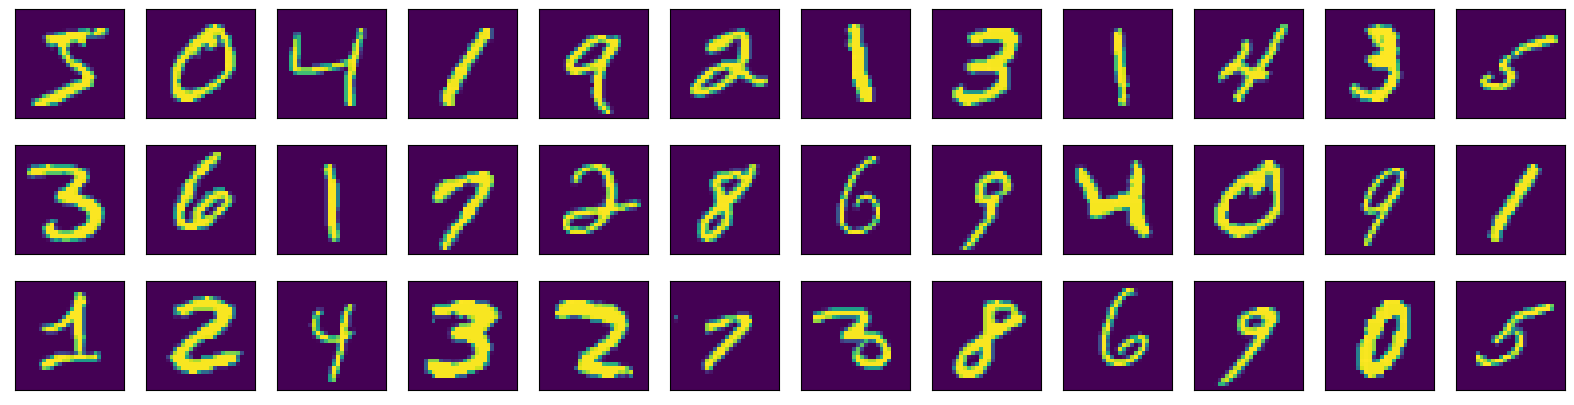

In [5]:
# visualisation of first 36 data
plt.figure(figsize=(20,5))
for i in range(36):
    plt.subplot(3, 12, i + 1,xticks=[],yticks=[])
    plt.imshow(x_train[i])

In [6]:
# to find the value count and uniqueness in the dataset
yv=pd.DataFrame(y_test,columns=['values_in_y'])

In [7]:
yv.values_in_y.unique()

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8], dtype=uint8)

In [8]:
# each classification has almost equal number of dataset which is good for training and prediction
yv.values_in_y.value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: values_in_y, dtype: int64

### Data Preprocessing
- Scaling the predictors to normalize the pixel values to a range between 0 (black) and 1 (white).
- since the image has value between 0 and 255 we can just divide the predictors with 255 instead of using Minmaxsacler and Stantard scaler.
- Large input values can lead to difficulties in optimization and convergence of the model.
- Scaling the inputs can help gradient-based optimization algorithms (such as backpropagation) converge faster and more reliably
- Flattening the data to import in mechine learning models.

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
y_train.shape

(60000,)

In [11]:
# Flattening the data to import in mechine learning models
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

### Model Training and Evaluation with different classification algorithm

### 1. Multinomial Logistic Regression Model

In [12]:
# importing the metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [13]:
# import logistic regression ,training and predicting
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='multinomial')
logistic.fit(x_train_flattened,y_train)
y_l_p=logistic.predict(x_test_flattened)

In [19]:
# testing data-accuracy score
logistic.score(x_train_flattened,y_train)

0.93505

In [15]:
# testing data-accuracy score
log_accuracy=accuracy_score(y_test,y_l_p)
print('accuracy score:',log_accuracy)
print ('f1 score:',f1_score(y_test,y_l_p,average='macro'))
cm_log=confusion_matrix(y_test,y_l_p)

accuracy score: 0.9258
f1 score: 0.9247923708033561


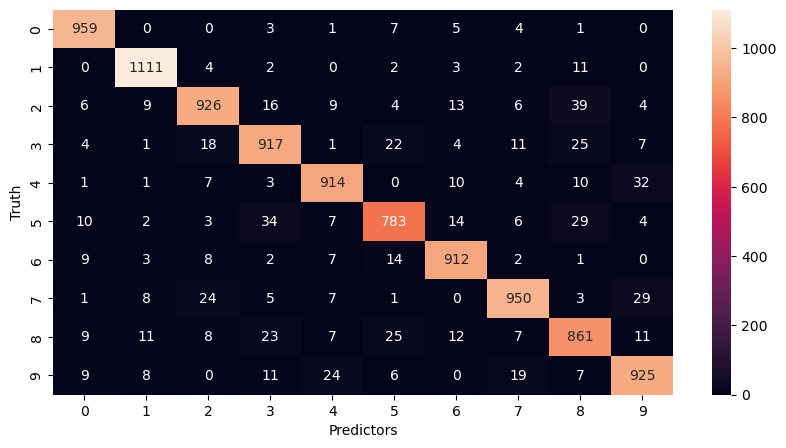

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_log,annot=True,fmt='d')
plt.xlabel('Predictors')
plt.ylabel('Truth')
plt.show()

### 2. Support Vector Classification Model

In [ ]:
# SVC MODEL importing
from sklearn.svm import SVC
svm=SVC(C=1,gamma=0.1,kernel='rbf')
svm.fit(x_train_flattened,y_train)

SVC(C=1, gamma=0.1)

In [ ]:
svm.decision_function_shape

'ovr'

In [ ]:
y_svm_p=svm.predict(x_test_flattened)
y_svm_p[0]

7

In [ ]:
svm_accuracy=accuracy_score(y_test,y_svm_p)
print('accuracy score:',svm_accuracy)
print ('f1 score:',f1_score(y_test,y_svm_p,average='macro'))
cm_svm=confusion_matrix(y_test,y_svm_p)

accuracy score: 0.9551
f1 score: 0.9565708525766647


In [73]:
svm_accuracy=0.9551

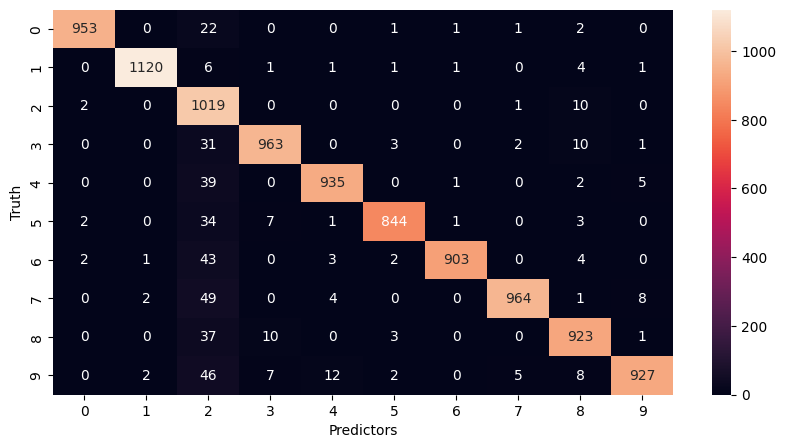

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_svm,annot=True,fmt='d')
plt.xlabel('Predictors')
plt.ylabel('Truth')
plt.show()

### 3. K-nearest Neighbor Model (KNN)

In [8]:
# importing K-nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors':list(range(3,15))},cv=3,scoring='accuracy',n_jobs=-1)
g.fit(x_train_flattened,y_train)

{'n_neighbors': 3}

In [16]:
print('best params:',g.best_params_)

best params: {'n_neighbors': 3}


In [26]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flattened,y_train)
y_knn_p=knn.predict(x_test_flattened)

In [27]:
# training score
knn.score(x_train_flattened,y_train)

0.9867166666666667

In [14]:
#testing score
knn_accuracy=accuracy_score(y_test,y_knn_p)
print('accuracy score:',knn_accuracy)
print ('f1 score:',f1_score(y_test,y_knn_p,average='macro'))
cm_knn=confusion_matrix(y_test,y_knn_p)

accuracy score: 0.9705
f1 score: 0.9703749561556656


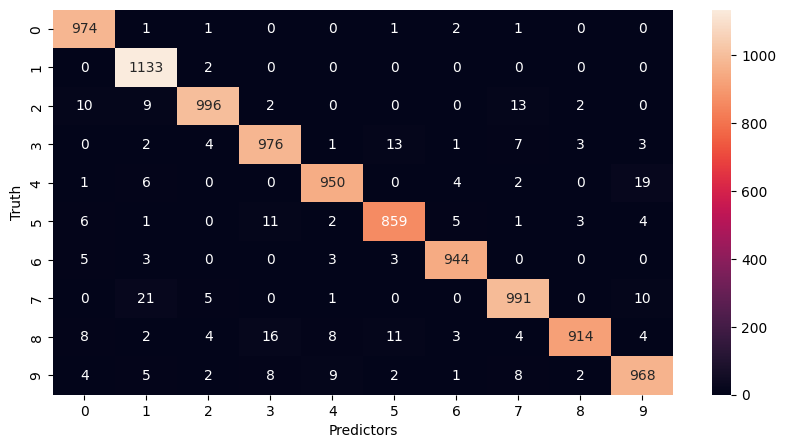

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_knn,annot=True,fmt='d')
plt.xlabel('Predictors')
plt.ylabel('Truth')
plt.show()

### Split the data into train and validation sets
- Splitting the data into train and validation sets is a common practice in machine learning to evaluate the performance of a model during training and to avoid overfitting.
- Model performance- The validation set allows you to assess how well your model generalizes to unseen data. By evaluating the model on a separate validation set, you can estimate its performance on new, unseen examples. This helps you gauge the model's effectiveness before deploying it in real-world scenarios.
- Early Stoppage-By monitoring the model's performance on the validation set during training, you can stop the training process when the model starts to overfit. This helps prevent excessive training and ensures the model generalizes well to new data.

In [9]:
from sklearn.model_selection import train_test_split
X_train,x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=11)

In [10]:
# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')

51000 train samples
10000 test samples
9000 validation samples


### 4. Artificial Neural Network Model (ANN)

In [43]:
from keras.models import Sequential
from keras.layers import  Dense,Flatten,Dropout
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(28,28,1)))
ann_model.add(Dense(100, activation='relu'))
ann_model.add(Dense(10, activation='softmax'))

ann_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [44]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the ANN model
ann_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val),shuffle=True,verbose=2)

Epoch 1/10
399/399 - 3s - loss: 0.4000 - accuracy: 0.8904 - val_loss: 0.2427 - val_accuracy: 0.9344 - 3s/epoch - 8ms/step
Epoch 2/10
399/399 - 2s - loss: 0.1863 - accuracy: 0.9467 - val_loss: 0.1871 - val_accuracy: 0.9463 - 2s/epoch - 6ms/step
Epoch 3/10
399/399 - 2s - loss: 0.1370 - accuracy: 0.9607 - val_loss: 0.1524 - val_accuracy: 0.9558 - 2s/epoch - 5ms/step
Epoch 4/10
399/399 - 2s - loss: 0.1089 - accuracy: 0.9690 - val_loss: 0.1397 - val_accuracy: 0.9576 - 2s/epoch - 4ms/step
Epoch 5/10
399/399 - 2s - loss: 0.0891 - accuracy: 0.9741 - val_loss: 0.1220 - val_accuracy: 0.9637 - 2s/epoch - 5ms/step
Epoch 6/10
399/399 - 2s - loss: 0.0742 - accuracy: 0.9786 - val_loss: 0.1151 - val_accuracy: 0.9653 - 2s/epoch - 6ms/step
Epoch 7/10
399/399 - 3s - loss: 0.0632 - accuracy: 0.9819 - val_loss: 0.1119 - val_accuracy: 0.9658 - 3s/epoch - 7ms/step
Epoch 8/10
399/399 - 4s - loss: 0.0542 - accuracy: 0.9848 - val_loss: 0.1048 - val_accuracy: 0.9667 - 4s/epoch - 9ms/step
Epoch 9/10
399/399 - 3s 

In [45]:
y_ann_p=ann_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [46]:
ann_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0840 - accuracy: 0.9755


[0.08404158055782318, 0.9754999876022339]

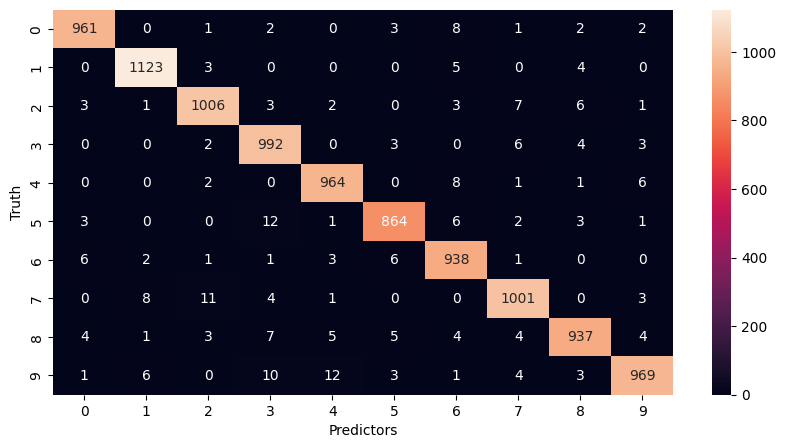

In [47]:
y_ann_p_labels = [np.argmax(i) for i in y_ann_p]
cm_ann=confusion_matrix(y_test,y_ann_p_labels)
plt.figure(figsize=(10,5))
sns.heatmap(cm_ann,annot=True,fmt='d')
plt.xlabel('Predictors')
plt.ylabel('Truth')
plt.show()

In [48]:
ann_accuracy=accuracy_score(y_test,y_ann_p_labels)
ann_accuracy

0.9755

### 5. Convolutional Neural Network Model(CNN)

In [49]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 3136)              0         
                                                                 
 dense_22 (Dense)            (None, 64)              

In [54]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, Y_train, batch_size=100, epochs=10, validation_data=(x_val, y_val),shuffle=True,verbose=2)

Epoch 1/10
510/510 - 96s - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0075 - val_accuracy: 0.9976 - 96s/epoch - 188ms/step
Epoch 2/10
510/510 - 70s - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0201 - val_accuracy: 0.9934 - 70s/epoch - 137ms/step
Epoch 3/10
510/510 - 70s - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0175 - val_accuracy: 0.9944 - 70s/epoch - 137ms/step
Epoch 4/10
510/510 - 76s - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0195 - val_accuracy: 0.9942 - 76s/epoch - 149ms/step
Epoch 5/10
510/510 - 76s - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0117 - val_accuracy: 0.9963 - 76s/epoch - 148ms/step
Epoch 6/10
510/510 - 68s - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0186 - val_accuracy: 0.9957 - 68s/epoch - 134ms/step
Epoch 7/10
510/510 - 66s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0133 - val_accuracy: 0.9956 - 66s/epoch - 129ms/step
Epoch 8/10
510/510 - 83s - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0259 - val_accuracy: 0.9936 - 83s/epoch - 163

In [55]:
# Evaluate the CNN model
loss, accuracy = cnn_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 6s 19ms/step - loss: 0.0367 - accuracy: 0.9921
Test Loss: 0.03667385131120682
Test Accuracy: 0.9921000003814697


In [63]:
y_cnn_p=cnn_model.predict(x_test)

313/313 [==============================] - 8s 23ms/step


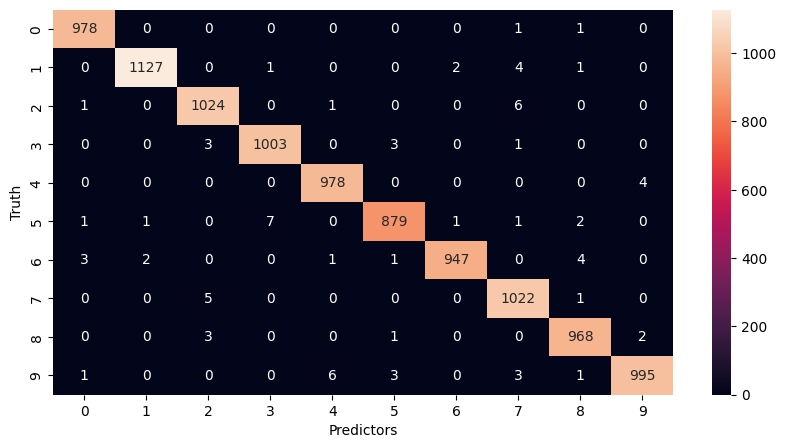

In [64]:
y_cnn_p_labels = [np.argmax(i) for i in y_cnn_p]
cm_cnn=confusion_matrix(y_test,y_cnn_p_labels)
plt.figure(figsize=(10,5))
sns.heatmap(cm_cnn,annot=True,fmt='d')
plt.xlabel('Predictors')
plt.ylabel('Truth')
plt.show()

In [65]:
cnn_accuracy=accuracy_score(y_test,y_cnn_p_labels)
cnn_accuracy

0.9921

### Visualize the prediction of CNN on random test data

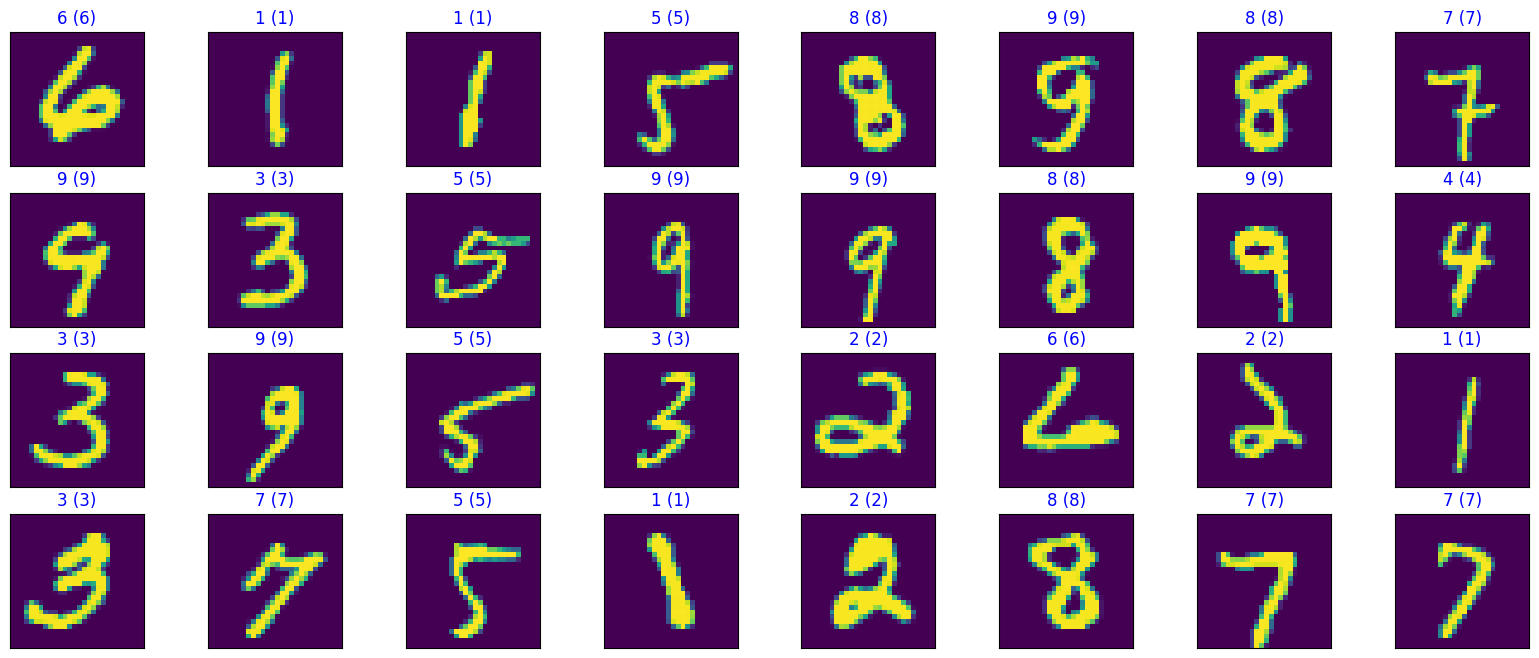

In [66]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    plt.subplot(4, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(x_test[idx])
    pred_idx = y_cnn_p_labels[idx]
    true_idx = y_test[idx]
    plt.title("{} ({})".format(pred_idx,true_idx),
                 color=("blue" if pred_idx == true_idx else "red"))

### Performance comparison of Models using Barplot
-  Convolutional Neural Network is performing good compared to other models

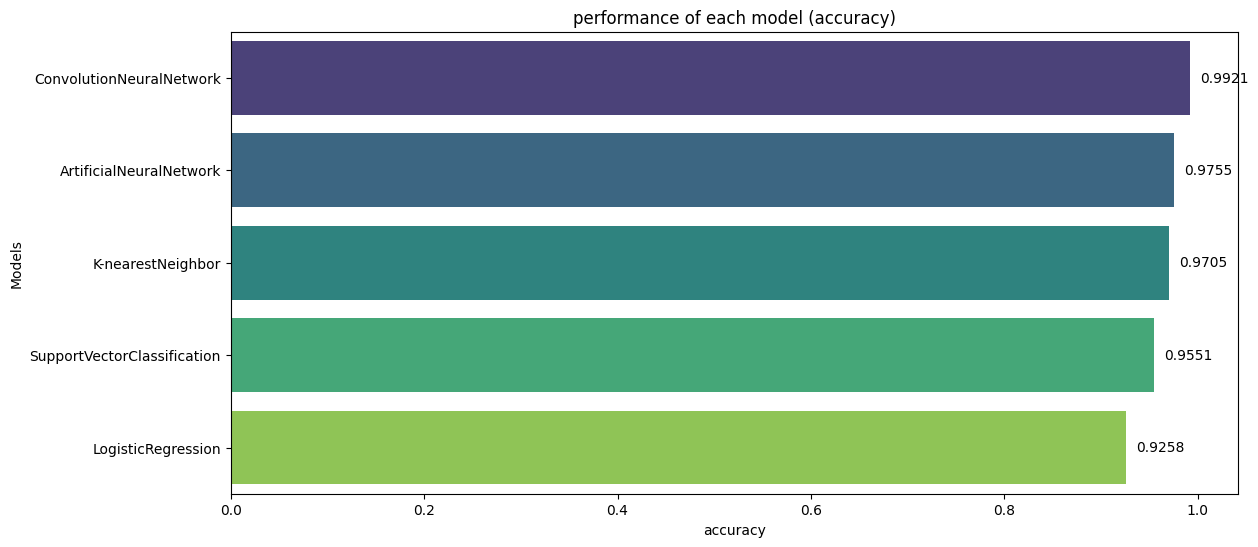

In [74]:
data = pd.DataFrame({
    'Models': ['LogisticRegression', 'SupportVectorClassification', 'K-nearestNeighbor','ArtificialNeuralNetwork','ConvolutionNeuralNetwork'],
    'accuracy': [log_accuracy,svm_accuracy,knn_accuracy,ann_accuracy,cnn_accuracy]})

# Sort the DataFrame by the values in descending order
data_sorted = data.sort_values('accuracy', ascending=False)
plt.figure(figsize=(13, 6))
ax=sns.barplot(x='accuracy', y='Models', data=data_sorted, palette='viridis')
plt.xlabel('accuracy')
plt.ylabel('Models')
plt.title('performance of each model (accuracy)')
# Add value annotations to the bars
for i, value in enumerate(data_sorted['accuracy']):
    ax.text(value + 0.01, i, str(round(value,4)), va='center')
plt.show()

### Model Comparison report

- Mnist dataset underwent a thorough data analysis process,data preprocessing for model implementation. 
- Various multi-class models like Multinomial Logistic Regression,Support Vector Classification,Knearest Neighbor,Artificial Neural Network,Convolution Neural Network were applied.
- The performance of each model was evaluated using metrics such as accuracy and confusion matrix. 
- To assess the models generalization ability, the accuracy score on the test dataset was compared to the accuracy score on the training dataset. 
- Similar or slightly lower accuracy scores on the test data indicate that the models are performing reasonably well on new, unseen data.
- It is important to thoroughly analyze and compare the performance of different models to ensure the selection of the most suitable one for the specific task of flight price prediction.



Multinomial Logistic Regressor  : 
- Based on the accuracy scores we got using multinomial logistic regression, it appears that the model is performing well on both the training and testing data.
- The training accuracy score of 0.93505 indicates that the model is able to predict the correct class for approximately 93.5% of the samples in the training dataset.
- The testing accuracy score of 0.925 shows that the model's performance is consistent and it generalizes well to unseen data.
- The F1 score is a measure of the model's performance that takes into account both precision and recall. An F1 score of 0.924 indicates that the model has a good balance between precision and recall, with a harmonic mean of 92.4%.
- Achieving high accuracy and F1 scores on both the training and testing datasets indicates that the logistic regression model is performing well for the task of classification. 
- It suggests that the model has learned meaningful patterns and is able to make accurate predictions on new, unseen data.



Support Vector Classification  :
- SVMs are powerful classifiers that can handle high-dimensional data and find complex decision boundaries. They work well with both linearly separable and non-linearly separable data.
- An testing accuracy score of 0.95 and F1 score of 0.95 was obtained using the support vector classification model by randomly setting penalty(C) as 1 and gamma as 0.1.
- A testing accuracy of 0.95 indicates that the support vector classification model is able to predict the correct class for approximately 95% of the samples in the testing dataset.
- the support vector classification model performs better than the logistic regression model across multiple evaluation metrics like accuracy, precision, recall, and F1 score, so it can be concluded that the support vector classification model is better suited for the given classification task.
- This can be further improved by hyperparameter tuning using GridSearchCV.


K-nearest Neighbour  :
- The KNN model with n_neighbors=3 achieved a training accuracy score of 0.986716,the testing accuracy score of 0.9705 suggests that the KNN model correctly predicts the class for approximately 97.1% of the samples in the testing dataset. 
- This demonstrates that the KNN model performs well and generalizes effectively to new, unseen data. 
- It can be concluded that the KNN model, with an optimized parameter of n_neighbors=3, performs better than both the logistic regression and support vector classification models.



Artificial Neural Network Model (ANN)  :
- The model is defined using the Sequential class from Keras. It's a sequential model, where layers are added sequentially.
- The first dense layer has 100 units and uses the ReLU activation function.
- The output layer has 10 units (corresponding to the 10 possible digits) and uses the softmax activation function.
- The training accuracy starts around 0.8904 and steadily improves with each epoch, reaching 0.9892 after 10 epochs.
- The validation accuracy also increases over the epochs, reaching 0.9691 after 10 epochs.
- Both the training and validation losses decrease, indicating that the model is learning and improving its predictions.
- The testing loss value of 0.0840 indicates the average loss incurred by the model when making predictions on the testing dataset. A lower loss value suggests better performance, as it indicates that the predicted values are closer to the true values.
- The testing accuracy of 0.9755 indicates that the ANN model is able to correctly predict the class for approximately 97.6% of the samples in the testing dataset.
- It can be concluded that the ANN model performs well on the testing dataset. It achieves high accuracy and relatively low loss, suggesting that it is able to effectively classify handwritten digits.



Convolutional Neural Network Model(CNN) :
- we import sequencial model ,the Conv2D function apply filters to the input images to extract relevant features.
- MaxPooling layers reduce the spatial dimensions of the input by taking the maximum value within each pooling window.
- The Flatten layer is used to flatten the 2D feature maps into a 1D array.
- Dense layers are added with 64 units and the ReLU activation function.
- The output layer has 10 units (corresponding to the 10 possible digits) and uses the softmax activation function.
- The model is compiled with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the evaluation metric.
- The model's performance on both the training and validation datasets steadily improves with each epoch. 
- The training accuracy starts around 99.71% and reaches 99.95% after 10 epochs and the validation accuracy is also throughout the process.
- The loss values for both the training and validation datasets decrease over the epochs, indicating that the model is getting better at minimizing the difference between its predicted outputs and the actual labels.
- The CNN model achieves a testing loss of 0.0367 and a testing accuracy of 0.9921.
- These results demonstrate that the model has learned meaningful patterns from the training data and can generalize well to new, unseen data.


Best Model for production  :
- The CNN model achieves the highest accuracy on the testing data, reaching an impressive score of 99.2%.
- The KNN model also performs well, achieving a training accuracy of 98.7% and a testing accuracy of 97.1%. However, the CNN model exhibits superior performance it in accuracy.
- While the SVC model achieves a testing accuracy of 95%, it falls behind the CNN model in terms of performance.
- The ANN model demonstrates decent performance, with a testing accuracy of 97.5%. Although it performs well, the CNN model outshines it in accuracy.
- To conclude, considering the comparison of the five models, the Convolutional Neural Network (CNN) emerges as the best choice for handwritten digits classification, this can be seen in the above bargraph.

### Report on Challenges faced

Reshaping Image Data for Recognition by Machine Learning Models  :
- During the development of the project, a challenge was encountered where the traditional machine learning models like logistic regression, K-Nearest Neighbors (KNN), and Support Vector Classification (SVC) were unable to effectively recognize and process the image data
- To address this challenge, a solution was implemented by reshaping the input data. The data was transformed from its original format, which was a 3-dimensional array representing images (number of samples, rows, columns), into a flattened 2-dimensional array (number of samples, flattened image size). The reshaping was performed using the reshape() function in Python.
- By reshaping the data, each image was transformed into a 1-dimensional array of pixel values. This allowed the traditional machine learning models to understand and process the data effectively.



High training time for certain ML Models  :

- Another challenge encountered was the significant training and prediction time required by traditional machine learning models like K-Nearest Neighbors (KNN) and Support Vector Classification (SVC), especially when compared to deep learning models. This is due to the underlying algorithms used by these models, which can be computationally expensive.
- In contrast, logistic regression showed relatively faster training time compared to KNN and SVC but lower accuracy compared to deep learning models.
- To address this challenge, one approach is to reduce the size of the training data, The MNIST dataset consists of 60,000 training samples and 10,000 testing samples.
- By reducing the training dataset size, either randomly or through a specific sampling technique, the training time can be significantly reduced without compromising the overall performance of the model. 
- This reduction in training data size can help reduce the computational complexity and speed up the training process for traditional machine learning models.
- However, it's important to carefully consider the trade-off between training time and performance. Reducing the training data size may result in a loss of valuable information which affects the model predicting performance. 
- It is advisable to experiment with different training data sizes and evaluate the performance trade-offs to find the optimal balance.
- In summary, to overcome the challenge of longer training and prediction times in traditional machine learning models, reducing the size of the training data can be an effective technique. However, it is crucial to strike the right balance between training time and model performance.